<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week09/explanatory_analysis_of_kmeans_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [ ]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vS5TuK_AiIJDFWVnHCtkfjOwwNv4BNHqa4gccFPjYbgEjZTkaUR-Hf-yj54RUq9pCWncJDKx_kKl0yk/pub?output=csv'
df = pd.read_csv(url, index_col = 'country')
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
# Check for duplicates and missing values
print('Duplicates:', df.duplicated().sum())
print('Missing Values:', df.isna().sum().sum())

Duplicates: 0
Missing Values: 0


In [ ]:
# Get the descriptive statistics
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
# Create a scaled copy of the data
scaler = StandardScaler()
X_scaled  = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
X_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [ ]:
# Find the optimal number of clusters
ks = range(2, 11)
inertias = []
sils = []
for k in ks:
  kmeans = KMeans(n_clusters = k, random_state = 42)
  kmeans.fit(X_scaled)
  sils.append(silhouette_score(X_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)

Text(0.5, 1.0, 'Inertia')

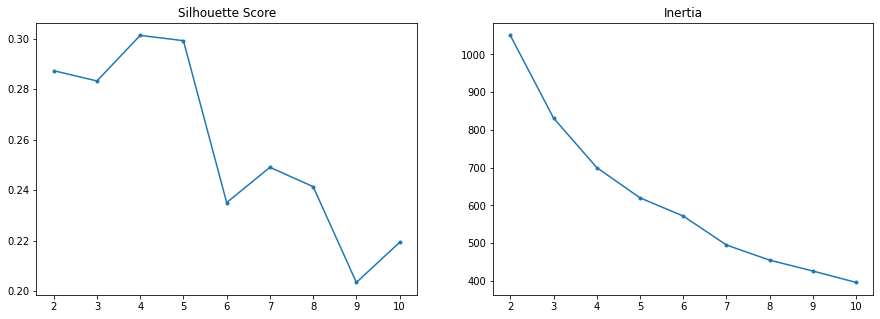

In [ ]:
# Plot the inertias and silhouette scores
fig, axes = plt.subplots(1, 2, figsize = (15, 5));
axes[0].plot(ks, sils, marker = '.');
axes[0].set_title('Silhouette Score');
axes[0].set_xticks(ks);
axes[1].plot(ks, inertias, marker = '.')
axes[1].set_xticks(ks);
axes[1].set_title('Inertia')

In [ ]:
# Build a model with k = 4
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(X_scaled)
# Add the clusters to the DataFrame
df['clusters'] = kmeans.labels_
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [ ]:
# Group the data by clusters
cluster_groups = df.groupby('clusters', as_index = False).mean()
cluster_groups

,clusters,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,21.389655,41.290678,6.235862,48.038689,12968.620690,7.413460,72.935632,2.286552,6919.103448
1,1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,2,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333
3,3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


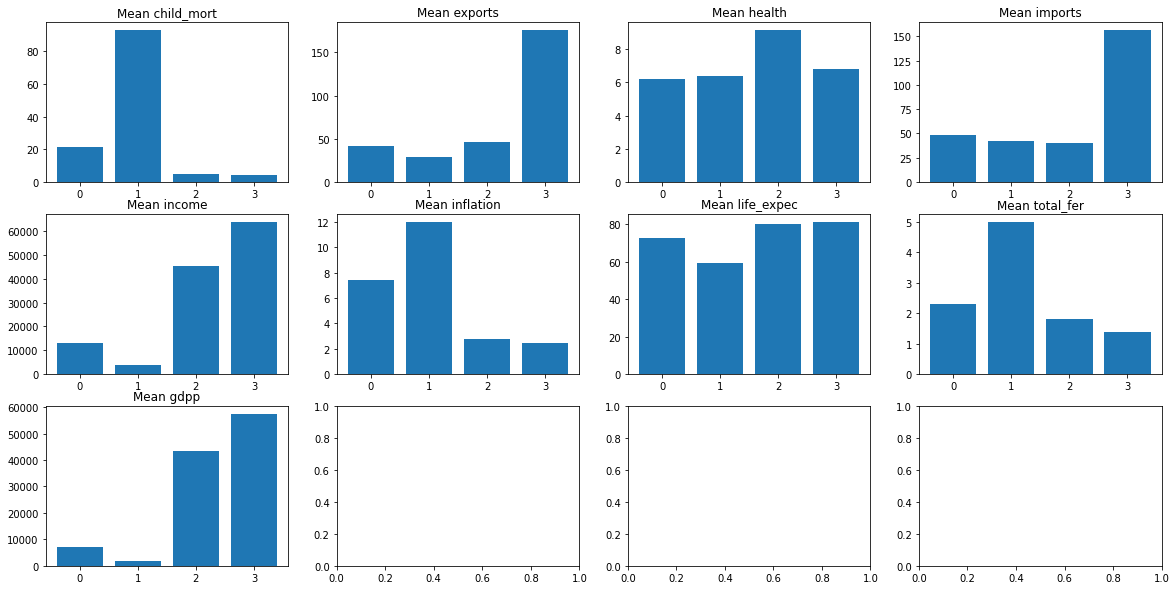

In [ ]:
# Make bar charts of each column in cluster_groups. (Except the column clusters.)
fig, axes = plt.subplots(3, 4, figsize = (20, 10));
axes = axes.ravel();
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['clusters'], cluster_groups[col]);
  axes[i].set_title(f'Mean {col}');

In [ ]:
# See which countries are in clusters 0 and 1
print(df.loc[df['clusters'] == 0, :].index)
print(df.loc[df['clusters'] == 1, :].index)

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Czech Republic', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia',
       'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia',
       'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia',
       'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia',
       'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia',
       'Montenegro', 'Morocco', 'Myanmar', 'Nepal', 'Oman', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia',
       'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Slovak Republic',
       'Solomon Islands', 'Sri